In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pulp as p
import random



In [16]:
# Get the Node Locations
location=pd.read_excel("q1.xlsx","Nodes",index_col=0)
Y=location.columns.values[0]
X=location.columns.values[1]
n_point=len(location)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


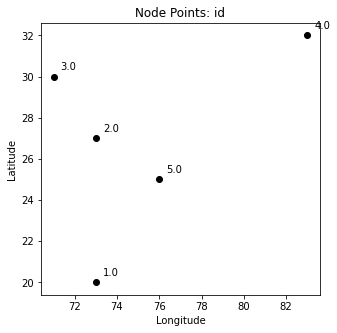

In [17]:
# Random Start/End Point; here the Depot is assumed to be the first Node
vehicle_depot=0

# Check TSP state
plt.figure(figsize=(5,5))

# Draw the problem state
for i, row in location.iterrows():
    if i == vehicle_depot:
        plt.scatter(row[X], row[Y], c='r')
        plt.text(row[X] + 0.33, row[Y] + 0.33, 'eV_Depot')
    else:
        plt.scatter(row[X], row[Y], c='black')
        plt.text(row[X] + 0.33, row[Y] + 0.33, f'{i}')
plt.title('Node Points: id')
plt.xlabel(X)
plt.ylabel(Y)
plt.show()




# Get the Distance Matrix
data=pd.read_excel("q1.xlsx","Distance Matrix",index_col=0)



In [18]:
# Set the problem
prob=p.LpProblem("MIP_TSP_Minimize_Small",p.LpMinimize)

# Set Variables
x=p.LpVariable.dicts('x',((i,j) for i in range(n_point) for j in range(n_point)),lowBound=0,upBound=1,cat='Binary')
#u=p.LpVariable.dicts('u',(i for i in range(n_point)),lowBound=1,upBound=n_point,cat='Integer')

# Set Objective Function
prob+=p.lpSum(data.iloc[i,j]*x[i,j] for i in range(n_point) for j in range(n_point))

# Set Constraints
for i in range(n_point):
    prob+=x[i,i]==0
    prob+=p.lpSum(x[i,j] for j in range(n_point))==1
    prob+=p.lpSum(x[j,i] for j in range(n_point))==1

for i in range(n_point):
    for j in range(n_point):
        if i!=j and i!=vehicle_depot-1 and j!= vehicle_depot-1:
            prob+=u[i]-u[j]+n_point*x[i,j]<=n_point-1
    
# Solve the problem
status=prob.solve()

# Output Status, Value of Objective Function
#status
#p.LpStatus[status]
#p.value(prob.objective)


IndexError: single positional indexer is out-of-bounds